# Import

In [18]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data

In [19]:
df = pd.read_csv('assets/text_simplification.csv')

print(df.shape)

(97, 15)


In [20]:
df = pd.read_excel('filtered/simplification.xlsx')

print(df.shape)

(73, 16)


# Counter

In [21]:
df.groupby('participant_id').aggregate({'id': 'count'}).sort_values('id', ascending=False)

,id
participant_id,
aaa,21
Monica Pizzella,11
Valentina,6
Francesca Grella,5
Loredana Di Rubbo,4
SC,4
Giuseppe Centillo,3
Silvana Rubbo,3
Sabrina Varriano,3


# Time

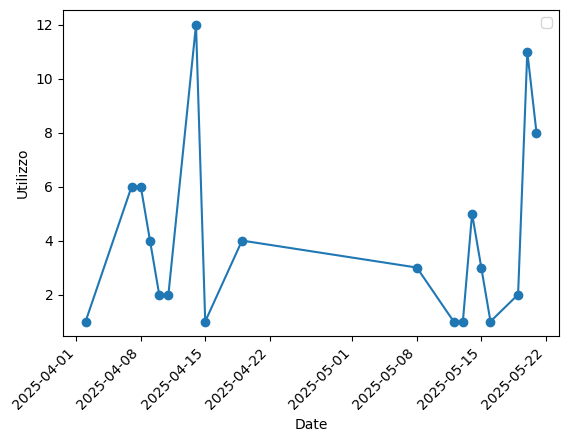

In [22]:
ax = df.groupby('date').aggregate({'id': 'count'}).plot(marker='o')
plt.xlabel('Date')
plt.ylabel('Utilizzo')
plt.xticks(rotation=45, ha='right')
plt.legend([])
plt.show()

# Questions

In [23]:
df[~df['q1'].isna()].shape

(30, 16)

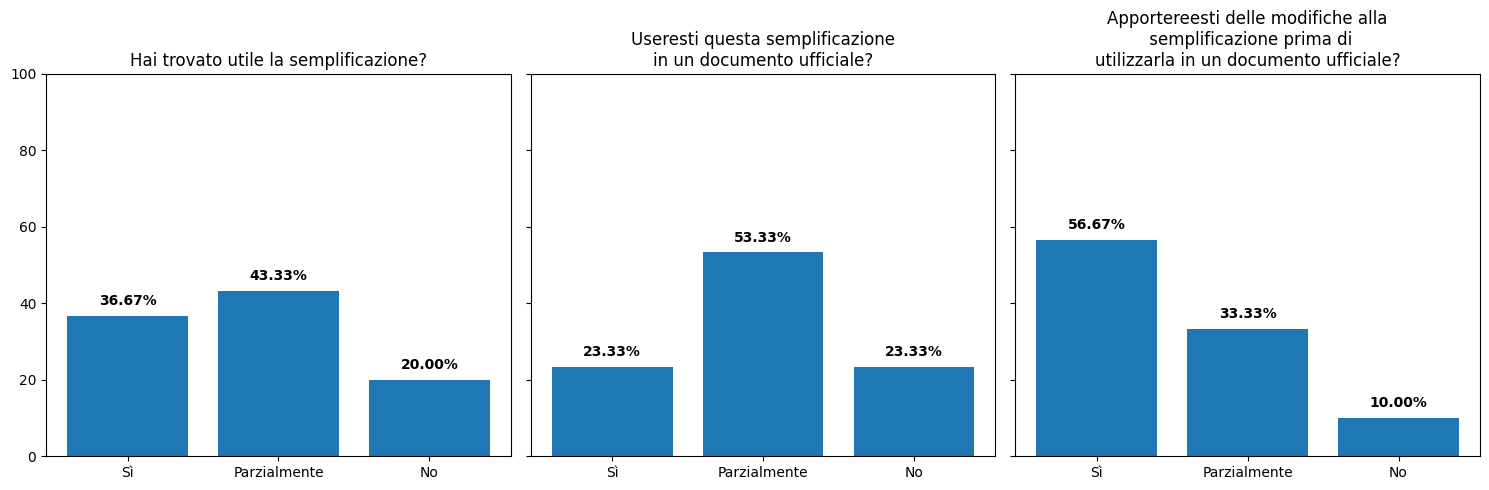

In [30]:
columns = ["q1", "q2", "q3"]
titles = ["Hai trovato utile la semplificazione?", "Useresti questa semplificazione\nin un documento ufficiale?", "Apportereesti delle modifiche alla\n semplificazione prima di\nutilizzarla in un documento ufficiale?"]

all_answers = sorted(set(df[columns].stack().unique()), reverse=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for ax, col, title in zip(axes, columns, titles):
    perc = (
        df[col]
        .value_counts(normalize=True)
        .reindex(all_answers, fill_value=0) * 100
    )

    bars = ax.bar(all_answers, perc.values)

    ax.set_title(title)
    ax.set_ylim(0, 100)

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 2,
            f"{height:.2f}%",
            ha="center",
            va="bottom",
            fontweight="bold"
        )

plt.tight_layout()
plt.show()

## Question 1 - Hai trovato utile la semplificazione?

In [25]:
df[~df['q1'].isna()].groupby('q1').aggregate({'id': 'count'}).sort_values('id', ascending=False)

,id
q1,
Parzialmente,13
Sì,11
No,6


## Question 2 - Useresti questa semplificazione in un documento ufficiale?

In [26]:
df[~df['q2'].isna()].groupby('q2').aggregate({'id': 'count'}).sort_values('id', ascending=False)

,id
q2,
Parzialmente,16
No,7
Sì,7


## Question 3 - Faresti delle modifiche manuali alla semplificazione ottenuta per utilizzarla in un documento ufficiale?

In [27]:
df[~df['q3'].isna()].groupby('q3').aggregate({'id': 'count'}).sort_values('id', ascending=False)

,id
q3,
Sì,17
Parzialmente,10
No,3
